In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('wiid2.csv')
df.columns=df.columns.str.replace(' ','_').str.lower()
#df.info()

In [31]:
df1=df.loc[:,['country','year','gini_reported','resource','region_un','region_un_sub','region_wb','areacovr']]
df1=df1.dropna(subset=['gini_reported','resource'])
df1['resource'].replace(to_replace=['Income (gross)','Income (net)','Income (net/gross)'],value=['Inc (g)','Inc (n)','Inc (n/g)'],inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11053 entries, 0 to 11100
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        11053 non-null  object 
 1   year           11053 non-null  int64  
 2   gini_reported  11053 non-null  float64
 3   resource       11053 non-null  object 
 4   region_un      11053 non-null  object 
 5   region_un_sub  11053 non-null  object 
 6   region_wb      11053 non-null  object 
 7   areacovr       11053 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 777.2+ KB


In [32]:
year_country=pd.crosstab(index=df1['year'],columns=df1['resource'],values=df1['country'],aggfunc="count")
#print(year_country)

In [33]:
indexNames = df1[df1['year'] < 2006].index
df1.drop(indexNames,inplace=True)
indexNames = df1[df1['year'] > 2016].index
df1.drop(indexNames,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600 entries, 0 to 11100
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3600 non-null   object 
 1   year           3600 non-null   int64  
 2   gini_reported  3600 non-null   float64
 3   resource       3600 non-null   object 
 4   region_un      3600 non-null   object 
 5   region_un_sub  3600 non-null   object 
 6   region_wb      3600 non-null   object 
 7   areacovr       3600 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 253.1+ KB


In [34]:
year_country=pd.crosstab(index=df1['year'],columns=df1['resource'],values=df1['country'],aggfunc="count")
print(year_country)

resource  Consumption  Earnings  Inc (g)  Inc (n)  Inc (n/g)
year                                                        
2006               49        35       27      116         93
2007               58        28       69      166         75
2008               57        36       36      122         82
2009               52        40       31      133         88
2010               80        35       76      190         86
2011               53        39       36      124         88
2012               55        36       43      124         82
2013               42        34       75      171         85
2014               39        35       42       84         80
2015               37        26       30       72         72
2016               26         2       11       54         43


In [35]:
country_year=pd.crosstab(index=df1['country'],columns=df1['resource'],values=df1['year'],aggfunc="count")
print(country_year)

resource            Consumption  Earnings  Inc (g)  Inc (n)  Inc (n/g)
country                                                               
Afghanistan                 1.0       NaN      NaN      NaN        NaN
Albania                     2.0       NaN      NaN      NaN        NaN
Algeria                     1.0       NaN      NaN      NaN        NaN
Angola                      4.0       NaN      NaN      NaN        3.0
Argentina                   NaN       1.0      NaN      6.0       32.0
...                         ...       ...      ...      ...        ...
Vietnam                    12.0       NaN      NaN      NaN        NaN
West Bank and Gaza          5.0       NaN      NaN      NaN        NaN
Yemen                       2.0       NaN      NaN      NaN        NaN
Zambia                      3.0       NaN      NaN      NaN        NaN
Zimbabwe                    4.0       NaN      NaN      NaN        NaN

[168 rows x 5 columns]


In [36]:
indexNames = df1[df1['resource'] == 'Earnings'].index
df1.drop(indexNames,inplace=True)
indexNames = df1[df1['resource'] == 'Inc (g)'].index
df1.drop(indexNames,inplace=True)
df1['year'].value_counts()

2010    356
2007    299
2013    298
2009    273
2011    265
2008    261
2012    261
2006    258
2014    203
2015    181
2016    123
Name: year, dtype: int64

In [37]:
df_c=df1.loc[df1['resource'] == 'Consumption']
df_i_n=df1.loc[df1['resource'] == 'Inc (n)']
df_i_ng=df1.loc[df1['resource'] == 'Inc (n/g)']

In [38]:
print(df_c.shape)
print(df_i_n.shape)
print(df_i_ng.shape)
df_c.head(10)

(548, 8)
(1356, 8)
(874, 8)


,country,year,gini_reported,resource,region_un,region_un_sub,region_wb,areacovr
0,Afghanistan,2008,29.00,Consumption,Asia,Southern Asia,South Asia,All
4,Albania,2008,29.98,Consumption,Europe,Southern Europe,Europe and Central Asia,All
5,Albania,2012,28.96,Consumption,Europe,Southern Europe,Europe and Central Asia,All
8,Algeria,2012,27.62,Consumption,Africa,Northern Africa,Middle East and North Africa,All
15,Angola,2009,43.00,Consumption,Africa,Middle Africa,Sub-Saharan Africa,All
17,Angola,2009,38.00,Consumption,Africa,Middle Africa,Sub-Saharan Africa,Rural
19,Angola,2009,39.00,Consumption,Africa,Middle Africa,Sub-Saharan Africa,Urban
20,Angola,2009,42.72,Consumption,Africa,Middle Africa,Sub-Saharan Africa,All
219,Armenia,2006,29.71,Consumption,Asia,Western Asia,Europe and Central Asia,All
222,Armenia,2007,31.23,Consumption,Asia,Western Asia,Europe and Central Asia,All


In [39]:
df_consumption_region=df_c.groupby(['region_un']).agg({'gini_reported': 'median'})
df_consumption_region

,gini_reported
region_un,
Africa,41.785
Americas,38.030
Asia,35.780
Europe,29.730
Oceania,39.140


In [40]:
df_consumption_subregion=df_c.groupby(['region_un_sub']).agg({'region_un': 'first','gini_reported': 'median'})
df_consumption_subregion=df_consumption_subregion.join(df_consumption_region, on='region_un', how='right', rsuffix='_region')
df_consumption_subregion['diff_from_region']=df_consumption_subregion['gini_reported']-df_consumption_subregion['gini_reported_region']
df_consumption_subregion

,region_un,gini_reported,gini_reported_region,diff_from_region
region_un_sub,,,,
Eastern Africa,Africa,42.600,41.785,0.815
Middle Africa,Africa,42.410,41.785,0.625
Northern Africa,Africa,33.000,41.785,-8.785
Southern Africa,Africa,59.385,41.785,17.600
Western Africa,Africa,40.880,41.785,-0.905
Caribbean,Americas,37.860,38.030,-0.170
Central America,Americas,45.360,38.030,7.330
Northern America,Americas,28.700,38.030,-9.330
South America,Americas,53.000,38.030,14.970


In [41]:
df_consumption_country=df_c.groupby(['country']).agg({'region_un': 'first','region_un_sub': 'first','gini_reported': 'median'})
df_consumption_country

,region_un,region_un_sub,gini_reported
country,,,
Afghanistan,Asia,Southern Asia,29.000
Albania,Europe,Southern Europe,29.470
Algeria,Africa,Northern Africa,27.620
Angola,Africa,Middle Africa,40.860
Armenia,Asia,Western Asia,29.990
...,...,...,...
Vietnam,Asia,South-eastern Asia,35.585
West Bank and Gaza,Asia,Western Asia,34.460
Yemen,Asia,Western Asia,35.720


In [42]:
df_income_net_region=df_i_n.groupby(['region_un']).agg({'gini_reported': 'median'})
df_income_net_region

,gini_reported
region_un,
Africa,65.55
Americas,48.00
Asia,34.60
Europe,29.50
Oceania,33.30


In [43]:
df_income_net_subregion=df_i_n.groupby(['region_un_sub']).agg({'region_un': 'first','gini_reported': 'median'})
df_income_net_subregion=df_income_net_subregion.join(df_income_net_region, on='region_un', how='right', rsuffix='_region')
df_income_net_subregion['diff_from_region']=df_income_net_subregion['gini_reported']-df_income_net_subregion['gini_reported_region']
df_income_net_subregion

,region_un,gini_reported,gini_reported_region,diff_from_region
region_un_sub,,,,
Eastern Africa,Africa,34.65,65.55,-30.90
Northern Africa,Africa,52.60,65.55,-12.95
Southern Africa,Africa,65.90,65.55,0.35
Caribbean,Americas,54.70,48.00,6.70
Central America,Americas,48.40,48.00,0.40
Northern America,Americas,33.80,48.00,-14.20
South America,Americas,48.50,48.00,0.50
Central Asia,Asia,39.70,34.60,5.10
Eastern Asia,Asia,33.00,34.60,-1.60


In [44]:
df_income_net_country=df_i_n.groupby(['country']).agg({'region_un': 'first','region_un_sub': 'first','gini_reported': 'median'})
df_income_net_country

,region_un,region_un_sub,gini_reported
country,,,
Argentina,Americas,South America,50.05
Armenia,Asia,Western Asia,40.00
Australia,Oceania,Australia and New Zealand,33.40
Austria,Europe,Western Europe,27.80
Belarus,Europe,Eastern Europe,27.90
...,...,...,...
Turkey,Asia,Western Asia,41.80
United Kingdom,Europe,Northern Europe,34.20
United States,Americas,Northern America,38.65


In [45]:
df_income_netgross_region=df_i_ng.groupby(['region_un']).agg({'gini_reported': 'median'})
df_income_netgross_region.head()

,gini_reported
region_un,
Africa,50.00
Americas,47.61
Asia,40.60
Europe,31.92
Oceania,31.40


In [46]:
df_income_netgross_subregion=df_i_ng.groupby(['region_un_sub']).agg({'region_un': 'first','gini_reported': 'median'})
df_income_netgross_subregion=df_income_netgross_subregion.join(df_income_netgross_region, on='region_un', how='right', rsuffix='_region')
df_income_netgross_subregion['diff_from_region']=df_income_netgross_subregion['gini_reported']-df_income_netgross_subregion['gini_reported_region']
df_income_netgross_subregion

,region_un,gini_reported,gini_reported_region,diff_from_region
region_un_sub,,,,
Eastern Africa,Africa,46.820,50.00,-3.180
Middle Africa,Africa,55.000,50.00,5.000
Western Africa,Africa,48.800,50.00,-1.200
Caribbean,Americas,46.500,47.61,-1.110
Central America,Americas,48.700,47.61,1.090
Northern America,Americas,40.410,47.61,-7.200
South America,Americas,46.700,47.61,-0.910
Eastern Asia,Asia,47.250,40.60,6.650
South-eastern Asia,Asia,46.050,40.60,5.450


In [47]:
df_income_netgross_country=df_i_ng.groupby(['country']).agg({'region_un': 'first','region_un_sub': 'first','gini_reported': 'median'})
df_income_netgross_country.head()

,region_un,region_un_sub,gini_reported
country,,,
Angola,Africa,Middle Africa,55.00
Argentina,Americas,South America,42.05
Australia,Oceania,Australia and New Zealand,31.40
Austria,Europe,Western Europe,30.53
Bangladesh,Asia,Southern Asia,45.20


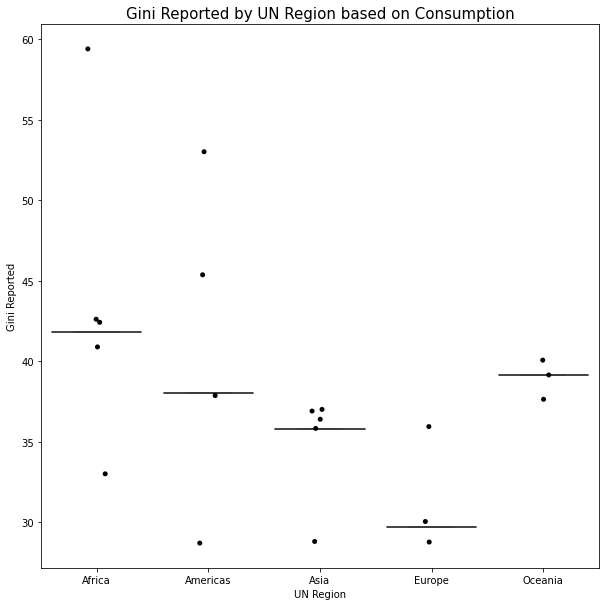

In [48]:
plt.figure(figsize=(10,10))
plot_consumption=sns.stripplot(y='gini_reported', x='region_un',
                   data=df_consumption_subregion, 
                   jitter=True,
                   marker='o', 
                   color='black')
plot_consumption=sns.boxplot(y='gini_reported_region', x='region_un', 
                   data=df_consumption_subregion)

plot_consumption.set_title("Gini Reported by UN Region based on Consumption", fontsize=15)
plot_consumption.set_xlabel ("UN Region")
plot_consumption.set_ylabel ("Gini Reported")
plt.show()

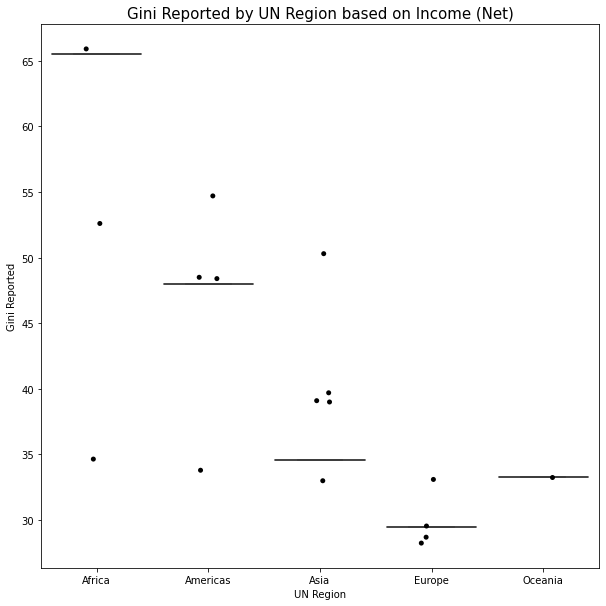

In [49]:
plt.figure(figsize=(10,10))
bplot_income_net=sns.stripplot(y='gini_reported', x='region_un', 
                   data=df_income_net_subregion, 
                   jitter=True, 
                   marker='o', 
                   color='black')
plot_income_net=sns.boxplot(y='gini_reported_region', x='region_un', 
                   data=df_income_net_subregion)

bplot_income_net.set_title("Gini Reported by UN Region based on Income (Net)", fontsize=15)
bplot_income_net.set_xlabel ("UN Region")
bplot_income_net.set_ylabel ("Gini Reported")
plt.show()

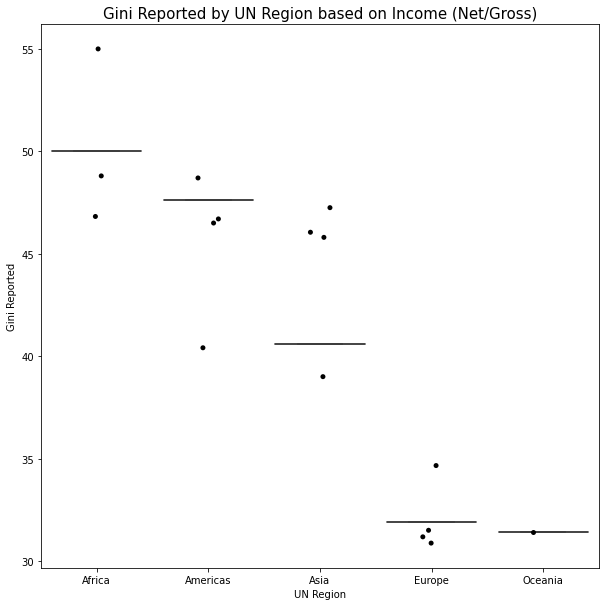

In [50]:
plt.figure(figsize=(10,10))
bplot_income_netgross=sns.stripplot(y='gini_reported', x='region_un', 
                   data=df_income_netgross_subregion, 
                   jitter=True, 
                   marker='o', 
                   color='black')
plot_income_netgross=sns.boxplot(y='gini_reported_region', x='region_un', 
                   data=df_income_netgross_subregion)

bplot_income_netgross.set_title("Gini Reported by UN Region based on Income (Net/Gross)", fontsize=15)
bplot_income_netgross.set_xlabel ("UN Region")
bplot_income_netgross.set_ylabel ("Gini Reported")
plt.show()

In [51]:
Africa_consumption = df_consumption_country.loc[df_consumption_country['region_un'] == 'Africa']
Africa_income_netgross = df_income_netgross_country.loc[df_income_netgross_country['region_un'] == 'Africa']
Africa_income_net = df_income_net_country.loc[df_income_net_country['region_un'] == 'Africa']

Americas_consumption = df_consumption_country.loc[df_consumption_country['region_un'] == 'Americas']
Americas_income_netgross = df_income_netgross_country.loc[df_income_netgross_country['region_un'] == 'Americas']
Americas_income_net = df_income_net_country.loc[df_income_net_country['region_un'] == 'Americas']

Asia_consumption = df_consumption_country.loc[df_consumption_country['region_un'] == 'Asia']
Asia_income_netgross = df_income_netgross_country.loc[df_income_netgross_country['region_un'] == 'Asia']
Asia_income_net = df_income_net_country.loc[df_income_net_country['region_un'] == 'Asia']

Europe_consumption = df_consumption_country.loc[df_consumption_country['region_un'] == 'Europe']
Europe_income_netgross = df_income_netgross_country.loc[df_income_netgross_country['region_un'] == 'Europe']
Europe_income_net = df_income_net_country.loc[df_income_net_country['region_un'] == 'Europe']

Oceania_consumption = df_consumption_country.loc[df_consumption_country['region_un'] == 'Oceania']
Oceania_income_netgross = df_income_netgross_country.loc[df_income_netgross_country['region_un'] == 'Oceania']
Oceania_income_net = df_income_net_country.loc[df_income_net_country['region_un'] == 'Oceania']

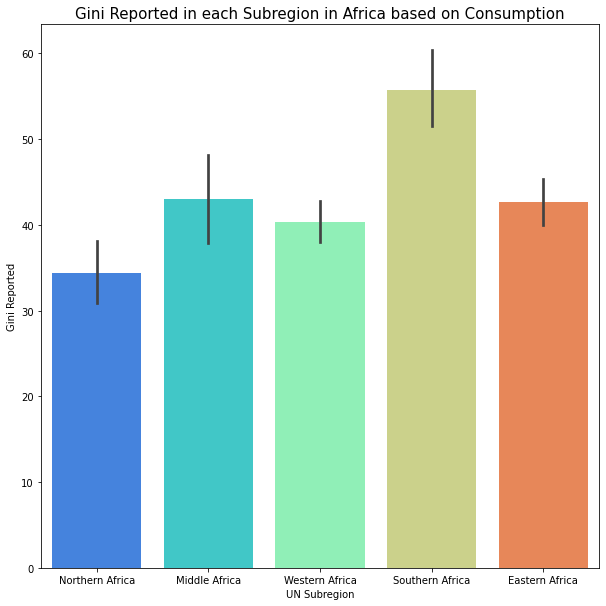

In [52]:
plt.figure(figsize=(10,10))
plot_Africa_consumption=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Africa_consumption, 
                   palette='rainbow',)

plot_Africa_consumption.set_title("Gini Reported in each Subregion in Africa based on Consumption", fontsize=15)
plot_Africa_consumption.set_xlabel ("UN Subregion")
plot_Africa_consumption.set_ylabel ("Gini Reported")
plt.show()

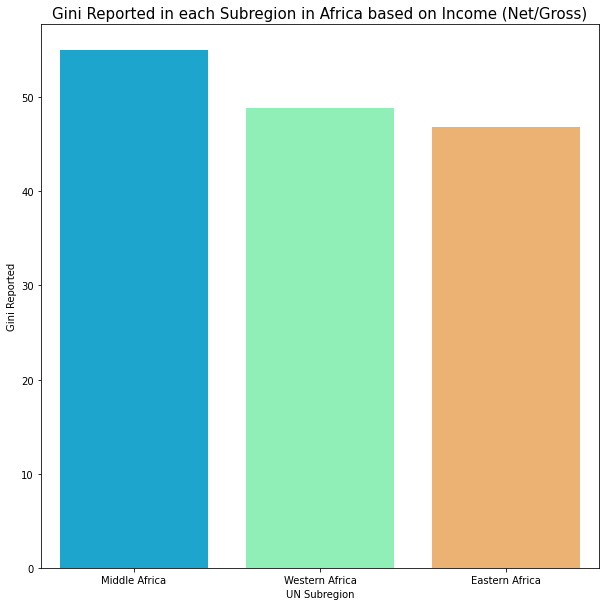

In [53]:
plt.figure(figsize=(10,10))

plot_Africa_income_netgross=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Africa_income_netgross, 
                   palette='rainbow',)

plot_Africa_income_netgross.set_title("Gini Reported in each Subregion in Africa based on Income (Net/Gross)", fontsize=15)
plot_Africa_income_netgross.set_xlabel ("UN Subregion")
plot_Africa_income_netgross.set_ylabel ("Gini Reported")
plt.show()

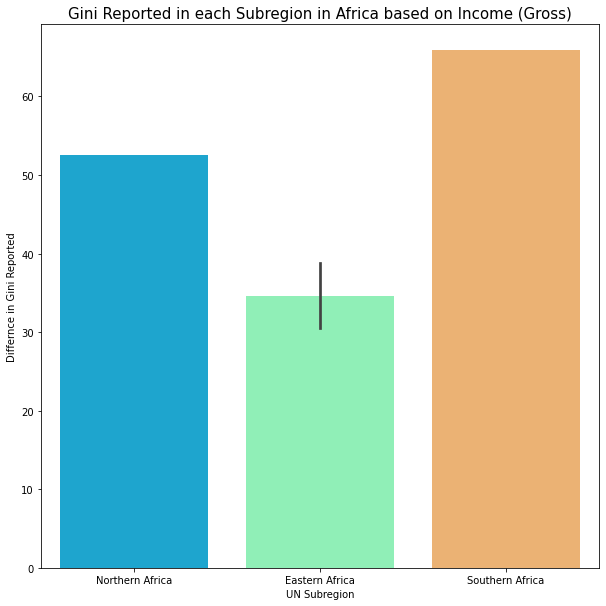

In [54]:
plt.figure(figsize=(10,10))

plot_Africa_income_net=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Africa_income_net, 
                   palette='rainbow',)

plot_Africa_income_net.set_title("Gini Reported in each Subregion in Africa based on Income (Gross)", fontsize=15)
plot_Africa_income_net.set_xlabel ("UN Subregion")
plot_Africa_income_net.set_ylabel ("Differnce in Gini Reported")
plt.show()

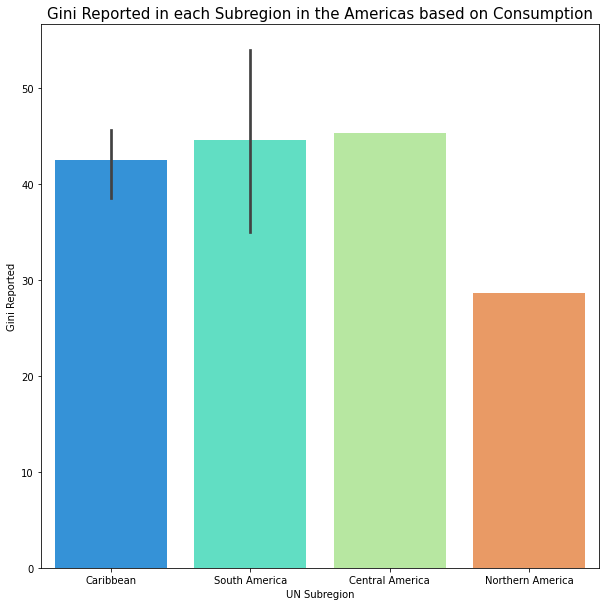

In [55]:
plt.figure(figsize=(10,10))
plot_Americas_consumption=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Americas_consumption, 
                   palette='rainbow',)

plot_Americas_consumption.set_title("Gini Reported in each Subregion in the Americas based on Consumption", fontsize=15)
plot_Americas_consumption.set_xlabel ("UN Subregion")
plot_Americas_consumption.set_ylabel ("Gini Reported")
plt.show()

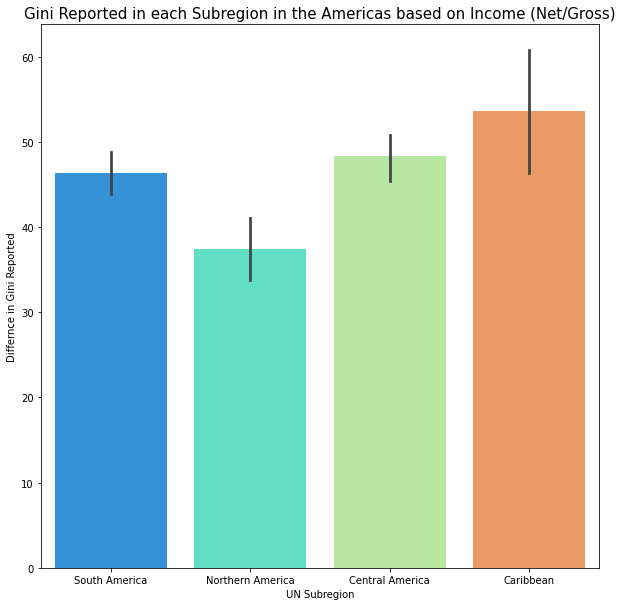

In [56]:
plt.figure(figsize=(10,10))

plot_Americas_income_netgross=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Americas_income_netgross, 
                   palette='rainbow',)

plot_Americas_income_netgross.set_title("Gini Reported in each Subregion in the Americas based on Income (Net/Gross)", fontsize=15)
plot_Americas_income_netgross.set_xlabel ("UN Subregion")
plot_Americas_income_netgross.set_ylabel ("Differnce in Gini Reported")
plt.show()

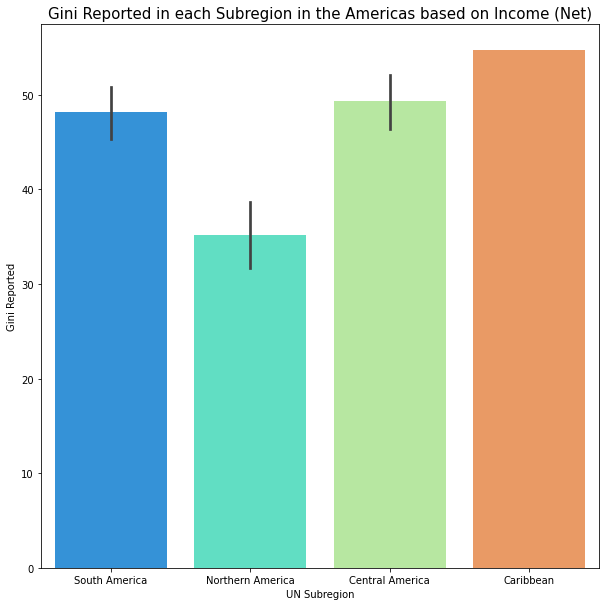

In [57]:
plt.figure(figsize=(10,10))

plot_Americas_income_net=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Americas_income_net, 
                   palette='rainbow',)

plot_Americas_income_net.set_title("Gini Reported in each Subregion in the Americas based on Income (Net)", fontsize=15)
plot_Americas_income_net.set_xlabel ("UN Subregion")
plot_Americas_income_net.set_ylabel ("Gini Reported")
plt.show()

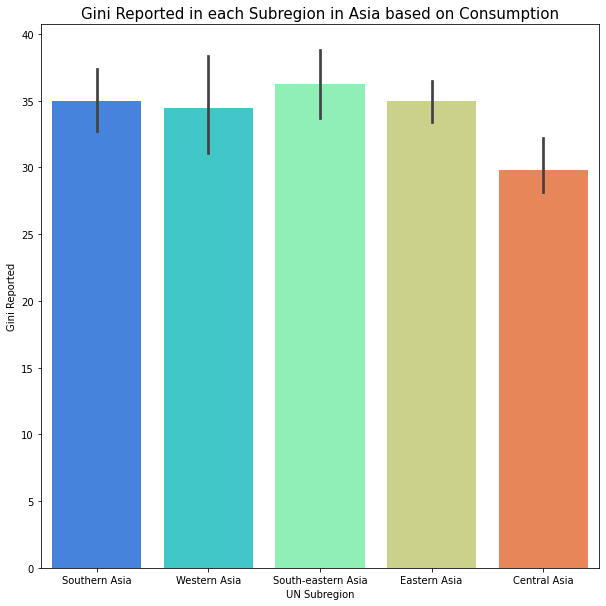

In [58]:
plt.figure(figsize=(10,10))
plot_Asia_consumption=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Asia_consumption, 
                   palette='rainbow',)

plot_Asia_consumption.set_title("Gini Reported in each Subregion in Asia based on Consumption", fontsize=15)
plot_Asia_consumption.set_xlabel ("UN Subregion")
plot_Asia_consumption.set_ylabel ("Gini Reported")
plt.show()

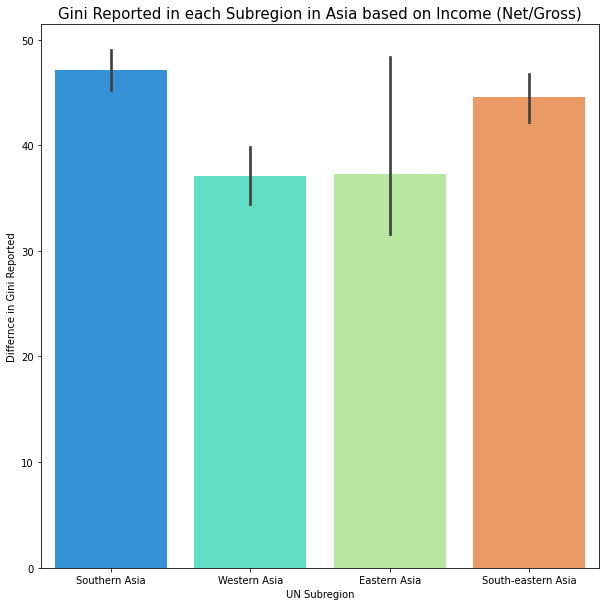

In [59]:
plt.figure(figsize=(10,10))

plot_Asia_income_netgross=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Asia_income_netgross, 
                   palette='rainbow',)

plot_Asia_income_netgross.set_title("Gini Reported in each Subregion in Asia based on Income (Net/Gross)", fontsize=15)
plot_Asia_income_netgross.set_xlabel ("UN Subregion")
plot_Asia_income_netgross.set_ylabel ("Differnce in Gini Reported")
plt.show()

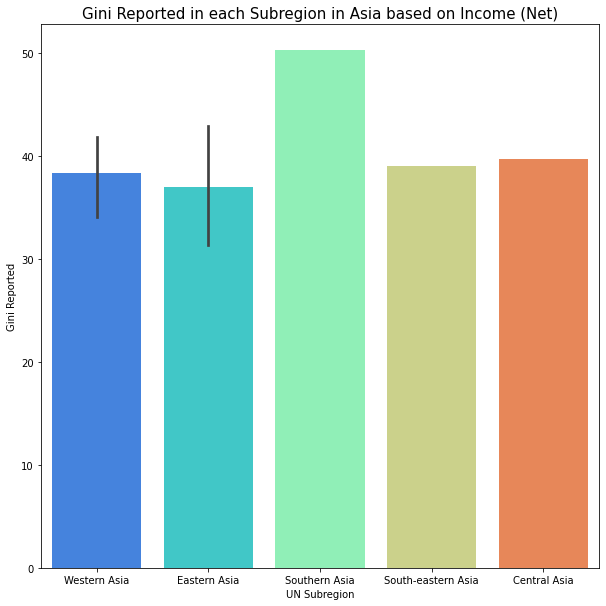

In [60]:
plt.figure(figsize=(10,10))

plot_Asia_income_net=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Asia_income_net, 
                   palette='rainbow',)

plot_Asia_income_net.set_title("Gini Reported in each Subregion in Asia based on Income (Net)", fontsize=15)
plot_Asia_income_net.set_xlabel ("UN Subregion")
plot_Asia_income_net.set_ylabel ("Gini Reported")
plt.show()

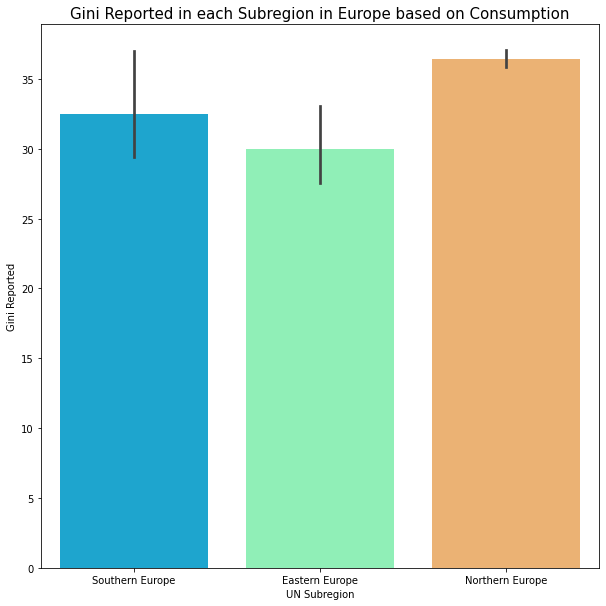

In [61]:
plt.figure(figsize=(10,10))
plot_Europe_consumption=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Europe_consumption, 
                   palette='rainbow',)

plot_Europe_consumption.set_title("Gini Reported in each Subregion in Europe based on Consumption", fontsize=15)
plot_Europe_consumption.set_xlabel ("UN Subregion")
plot_Europe_consumption.set_ylabel ("Gini Reported")
plt.show()

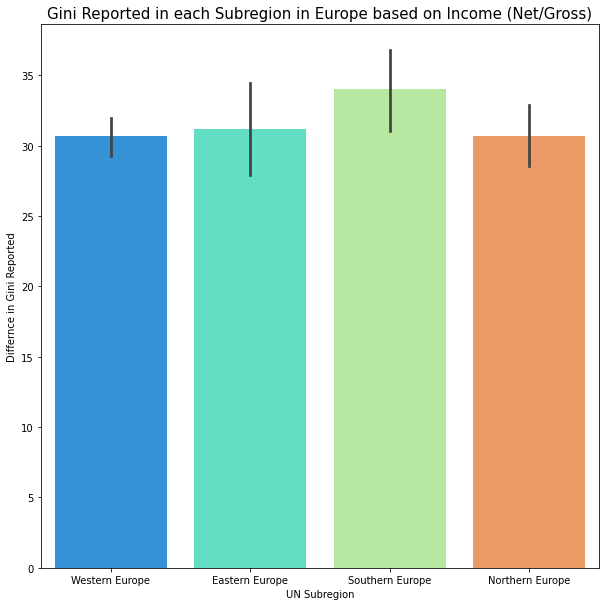

In [62]:
plt.figure(figsize=(10,10))

plot_Europe_income_netgross=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Europe_income_netgross, 
                   palette='rainbow',)

plot_Europe_income_netgross.set_title("Gini Reported in each Subregion in Europe based on Income (Net/Gross)", fontsize=15)
plot_Europe_income_netgross.set_xlabel ("UN Subregion")
plot_Europe_income_netgross.set_ylabel ("Differnce in Gini Reported")
plt.show()

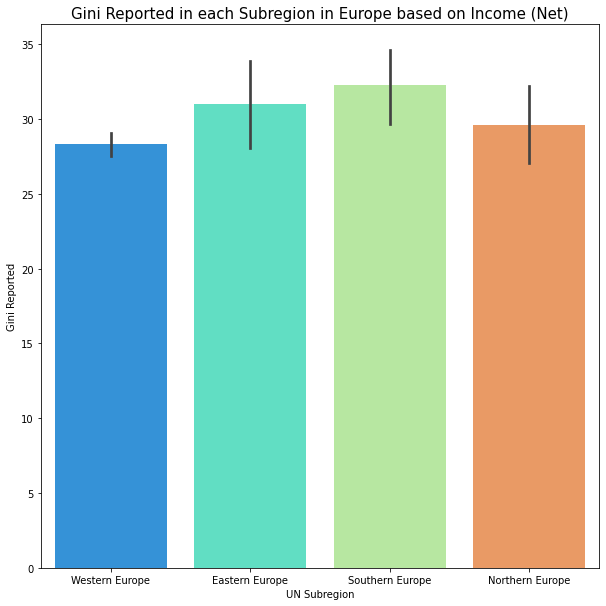

In [63]:
plt.figure(figsize=(10,10))

plot_Europe_income_net=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Europe_income_net, 
                   palette='rainbow',)

plot_Europe_income_net.set_title("Gini Reported in each Subregion in Europe based on Income (Net)", fontsize=15)
plot_Europe_income_net.set_xlabel ("UN Subregion")
plot_Europe_income_net.set_ylabel ("Gini Reported")
plt.show()

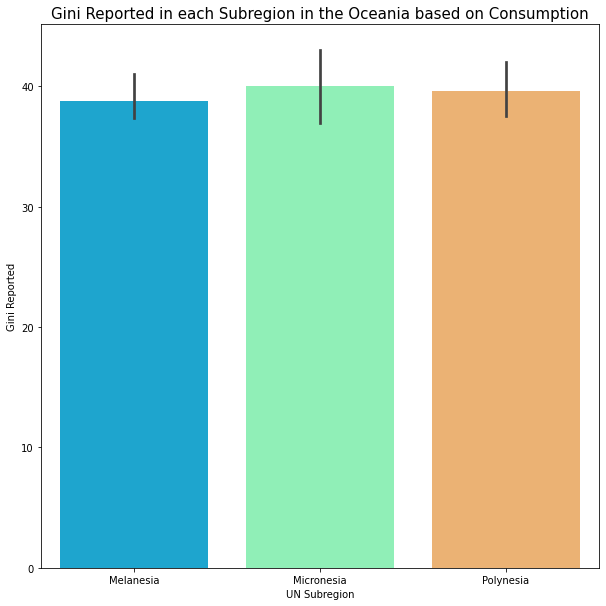

In [64]:
plt.figure(figsize=(10,10))
plot_Oceania_consumption=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Oceania_consumption, 
                   palette='rainbow',)

plot_Oceania_consumption.set_title("Gini Reported in each Subregion in the Oceania based on Consumption", fontsize=15)
plot_Oceania_consumption.set_xlabel ("UN Subregion")
plot_Oceania_consumption.set_ylabel ("Gini Reported")
plt.show()

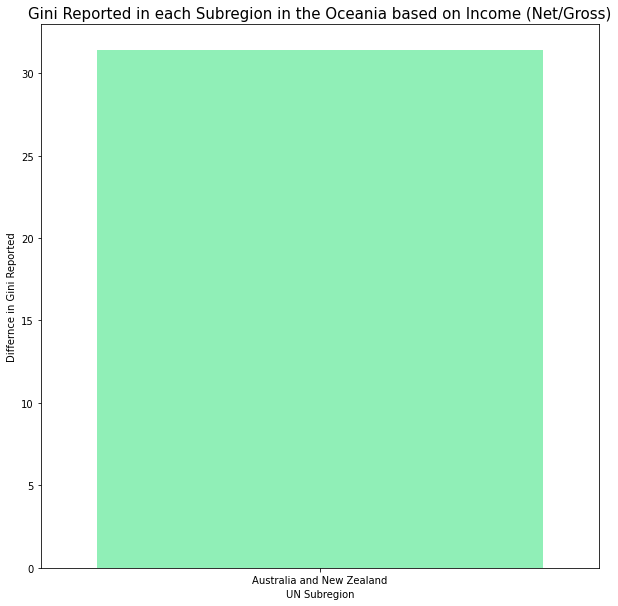

In [65]:
plt.figure(figsize=(10,10))

plot_Oceania_income_netgross=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Oceania_income_netgross, 
                   palette='rainbow',)

plot_Oceania_income_netgross.set_title("Gini Reported in each Subregion in the Oceania based on Income (Net/Gross)", fontsize=15)
plot_Oceania_income_netgross.set_xlabel ("UN Subregion")
plot_Oceania_income_netgross.set_ylabel ("Differnce in Gini Reported")
plt.show()

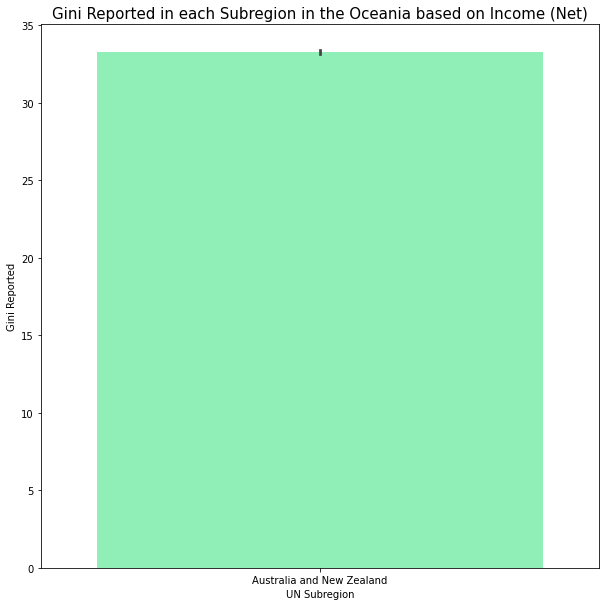

In [66]:
plt.figure(figsize=(10,10))

plot_Oceania_income_net=sns.barplot(y='gini_reported', x='region_un_sub', 
                   data=Oceania_income_net, 
                   palette='rainbow',)

plot_Oceania_income_net.set_title("Gini Reported in each Subregion in the Oceania based on Income (Net)", fontsize=15)
plot_Oceania_income_net.set_xlabel ("UN Subregion")
plot_Oceania_income_net.set_ylabel ("Gini Reported")
plt.show()